<a href="https://colab.research.google.com/github/damianwgriggs/Quantum-Twin-Simulation-Proof/blob/main/Quantum_Twin_Proof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 89.7 MB/s eta 0:00:00


<>:75: SyntaxWarning: invalid escape sequence '\c'
<>:75: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-1716026610.py:75: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Quantum Beats: Time Evolution under $H = A \cdot X + B \cdot Z$', fontsize=16, fontweight='bold')


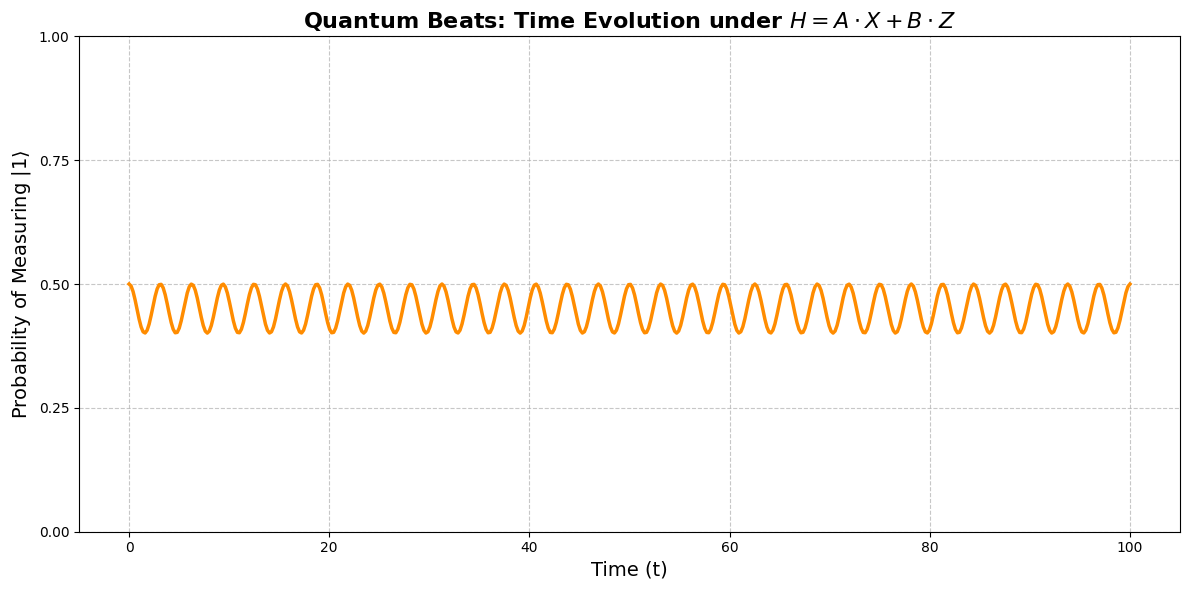

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cirq
from typing import List

# --- I. Define the System (Qubit and Hamiltonian) ---

q = cirq.LineQubit(0)

# Define the Hamiltonian Coefficients (A = Laser, B = Magnetic Field)
# Use simple, distinct values to generate a clear, slow beat
A = 1.0  # Laser strength
B = 0.1  # Magnetic Field strength
HAMILTONIAN_MAGNITUDE = np.sqrt(A**2 + B**2)


# Function for the time evolution operator U(t)
def time_evolution_gate(time: float):
    """Returns the time evolution operator U(t) for H = A*X + B*Z."""
    C = HAMILTONIAN_MAGNITUDE

    # U(t) = cos(C*t) * I - i/C * sin(C*t) * (A*X + B*Z)
    real_part = np.cos(C * time) * np.eye(2)
    imag_part = (1j / C) * np.sin(C * time) * (A * cirq.unitary(cirq.X) + B * cirq.unitary(cirq.Z))

    U_t = real_part - imag_part

    return cirq.MatrixGate(U_t).on(q)


# --- II. Define the Simulation Parameters ---

TOTAL_TIME = 100.0 # Significantly increased time to show the slow beat clearly
NUM_STEPS = 500
times = np.linspace(0.0, TOTAL_TIME, NUM_STEPS)


# --- III. Run the Time Evolution Simulation ---

simulator = cirq.Simulator()
prob_of_one = []

# Prepare the initial state: RZ(pi/2) followed by H.
# This state is NOT symmetric, which is necessary for clear beats.
initial_circuit = cirq.Circuit(
    cirq.Rz(rads=np.pi/2).on(q), # Shift the starting point
    cirq.H(q) # Create superposition
)
initial_state = simulator.simulate(initial_circuit, qubit_order=[q]).state_vector()


for t in times:
    # 1. Get the unitary matrix for the current time step
    U_t_gate = time_evolution_gate(t)
    U_t_matrix = cirq.unitary(U_t_gate)

    # 2. Apply U(t) to the initial_state vector
    final_state = U_t_matrix @ initial_state

    # 3. Extract the probability of finding the qubit in the |1> state
    amplitude_of_one = final_state[1]
    probability = np.abs(amplitude_of_one)**2

    prob_of_one.append(probability)


# --- IV. Plot the Results ---

plt.figure(figsize=(12, 6))

plt.plot(times, prob_of_one, color='darkorange', linewidth=2.5)

# Format the plot
plt.title('Quantum Beats: Time Evolution under $H = A \cdot X + B \cdot Z$', fontsize=16, fontweight='bold')
plt.xlabel('Time (t)', fontsize=14)
plt.ylabel('Probability of Measuring $|1\\rangle$', fontsize=14)
plt.yticks(np.linspace(0, 1, 5))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()